# Name : Tharindu O.K.D
# Index No. : 190622R

### Question 01

(-0.5, 60.5, 60.5, -0.5)

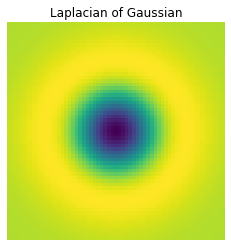

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
plt.imshow(log)
plt.title("Laplacian of Gaussian")
plt.axis("off")


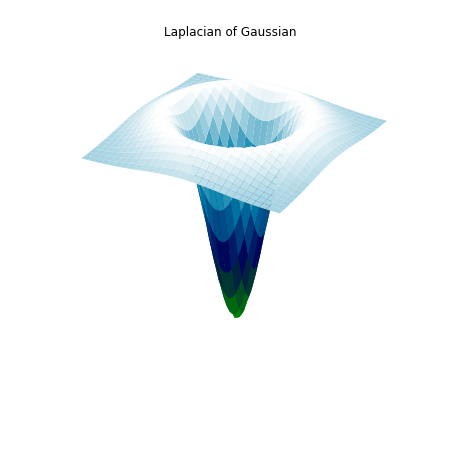

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth = 0, antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis("off")
plt.title("Laplacian of Gaussian")
plt.show()

### Question 02

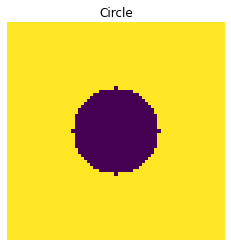

In [3]:
w, h = 71, 71
hw, hh = w//2, h//2

f = np.ones((h,w), np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))

r = w//5
f *= X**2 + Y**2 > r**2

plt.imshow(f)
plt.axis("off")
plt.title("Circle")
plt.show()

(35, 35, 5)
Maximum response occurs at  σ =  10


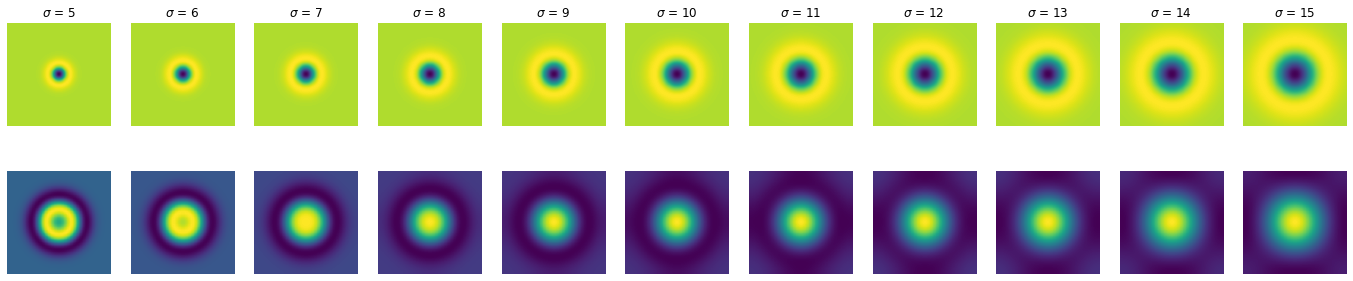

In [4]:
import cv2 as cv
s = 11
fig, ax = plt.subplots(2, s, figsize=(24,5))
scale_space = np.empty((h, w, s), np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis("off")
    ax[0, i].set_title("$\sigma$ = {}".format(sigma))
    ax[1, i].imshow(f_log)
    ax[1, i].axis("off")

indices = np.unravel_index(np.argmax(scale_space, None), scale_space.shape)
print(indices)
print("Maximum response occurs at  σ = ", sigmas[indices[2]])
    

**Explanation** : According to the thoery, the maximum respone should be be occured at $\sigma = r/\sqrt{2}$ i.e $\sigma = 14/\sqrt{2} = 9.899 $. We can see that from above plots, we also get scale-space extremum at $\sigma = 10$. Which means LoG filter gives maximum response at $\sigma = 10$.

### Question 03

In [5]:
import cv2 as cv
img1 = cv.imread("images\img1.ppm")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread("images\img3.ppm")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)


sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:150], img2, flags=2)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img3)
ax.set_title("Match SIFT features")
plt.axis("off")
plt.show()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

### Question 04

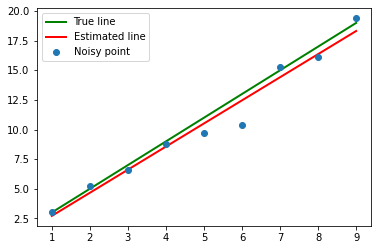

In [ ]:
m = 2
c = 1
x = np.arange(1, 10, 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
# o[=1] = 20
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=2, label=r'Estimated line')
plt.plot(x, y, 'o', label='Noisy point')
plt.legend()
plt.show()

### Question 05

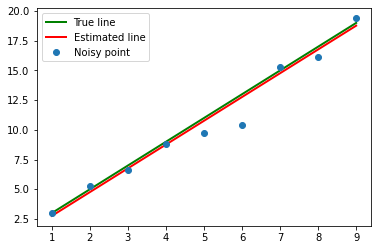

In [ ]:
m = 2
c = 1
x = np.arange(1, 10, 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
# o[=1] = 20
y = m*x + c + noise + o

n = len(x)
x_ = np.mean(x)
y_ = np.mean(y)
u11 = np.sum((x - x_)**2)
u12 = np.sum((x - x_)*(y - y_))
u21 = u12
u22 = np.sum((y - y_)**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smalest_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smalest_ev[0]
b = ev_corresponding_to_smalest_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
ctar = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=2, label=r'Estimated line')
plt.plot(x, y, 'o', label='Noisy point')
plt.legend()
plt.show()

**Discussion** : We can see from the above 2 plots, total least square gives better result.